## Pre-requisites

### Spark

In [1]:
!apt-get -y install openjdk-8-jdk-headless && apt autoremove
!wget -N http://apache.osuosl.org/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf spark-2.4.3-bin-hadoop2.7.tgz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u212-b03-0ubuntu1.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-410
0 upgraded, 0 newly installed, 1 to remove and 6 not upgraded.
After this operation, 33.8 kB disk space will be freed.
(Reading database ... 130911 files and directories currently installed.)
Removing libnvidia-common-410 (410.104-0ubuntu1) ...
--2019-05-24 01:48:13--  http://apache.osuosl.org/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
Resolving apache.osuosl.org (apache.osuosl.org)... 140.211.166.134, 64.50.236.52, 64.50.233.100, ...
Connecting to apache

### Python Packages

In [2]:
!pip install -U findspark numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.3)


### GraphFrames

In [3]:
!wget -N http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.7.0-spark2.4-s_2.11/graphframes-0.7.0-spark2.4-s_2.11.jar
!mv graphframes-0.7.0-spark2.4-s_2.11.jar spark-2.4.3-bin-hadoop2.7/jars

--2019-05-24 01:48:45--  http://dl.bintray.com/spark-packages/maven/graphframes/graphframes/0.7.0-spark2.4-s_2.11/graphframes-0.7.0-spark2.4-s_2.11.jar
Resolving dl.bintray.com (dl.bintray.com)... 52.35.37.1, 52.25.147.105
Connecting to dl.bintray.com (dl.bintray.com)|52.35.37.1|:80... connected.
HTTP request sent, awaiting response... 302 
Location: http://d29vzk4ow07wi7.cloudfront.net/ef6e26d17a860d3c8d7a246236f9d51256d56946cc3e9ef10aa3cf6465fd7e6a?response-content-disposition=attachment%3Bfilename%3D%22graphframes-0.7.0-spark2.4-s_2.11.jar%22&Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6Imh0dHAqOi8vZDI5dnprNG93MDd3aTcuY2xvdWRmcm9udC5uZXQvZWY2ZTI2ZDE3YTg2MGQzYzhkN2EyNDYyMzZmOWQ1MTI1NmQ1Njk0NmNjM2U5ZWYxMGFhM2NmNjQ2NWZkN2U2YT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0JmaWxlbmFtZSUzRCUyMmdyYXBoZnJhbWVzLTAuNy4wLXNwYXJrMi40LXNfMi4xMS5qYXIlMjIiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE1NTg2NjMyNDV9LCJJcEFkZHJlc3MiOnsiQVdTOlNvdXJjZUlwIjoiMC4wLjAuMC8wIn19fV19&

### Setup Environment Variables

In [0]:
import os

In [0]:
os.environ["JAVA_HOME"] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ["SPARK_HOME"] = os.path.join(os.getcwd(), 'spark-2.4.3-bin-hadoop2.7')
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.7.0-spark2.4-s_2.11 pyspark-shell'

In [6]:
print(os.environ['JAVA_HOME'])
print(os.environ['SPARK_HOME'])
# print(os.environ['PYSPARK_SUBMIT_ARGS'])

/usr/lib/jvm/java-8-openjdk-amd64
/content/spark-2.4.3-bin-hadoop2.7


## Spark Initialization

In [0]:
import findspark
findspark.init()

In [0]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc.addPyFile('spark-2.4.3-bin-hadoop2.7/jars/graphframes-0.7.0-spark2.4-s_2.11.jar')

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

## Dataset Preparation

### Download

In [10]:
!wget -N http://arnetminer.org/lab-datasets/tweet/twitter_network.rar

--2019-05-24 01:48:56--  http://arnetminer.org/lab-datasets/tweet/twitter_network.rar
Resolving arnetminer.org (arnetminer.org)... 54.200.245.252
Connecting to arnetminer.org (arnetminer.org)|54.200.245.252|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://aminer.org/lab-datasets/tweet/twitter_network.rar [following]
--2019-05-24 01:48:56--  https://aminer.org/lab-datasets/tweet/twitter_network.rar
Resolving aminer.org (aminer.org)... 54.200.245.252
Connecting to aminer.org (aminer.org)|54.200.245.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3368748 (3.2M) [application/x-rar-compressed]
Saving to: ‘twitter_network.rar’

twitter_network.rar 100%[===================>]   3.21M  --.-KB/s    in 0.08s   

2019-05-24 01:48:56 (37.9 MB/s) - ‘twitter_network.rar’ saved [3368748/3368748]



### Extract

In [11]:
!unrar e twitter_network.rar -o- data/


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from twitter_network.rar

Creating    data                                                      OK
Extracting  data/user_list.txt                                             0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11%  OK 
Extracting  data/user_map.txt                                             12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47%  OK 
Extracting  data/count.txt                                                47%  OK 
Extracting  data/graph_cb.txt                                             48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60%

## Build Graph

### Vertices

In [0]:
with open('data/user_list.txt') as infile:
    user_list = infile.read().split('\n')[:-1]

In [0]:
user_list = list(enumerate(map(int, user_list)))

In [0]:
vertices = spark.createDataFrame(user_list, ['id', 'name']).limit(1000)

In [15]:
vertices.count()

1000

In [16]:
vertices.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: long (nullable = true)



In [17]:
vertices.show(10)

+---+----+
| id|name|
+---+----+
|  0| 407|
|  1| 674|
|  2| 852|
|  3| 922|
|  4|1024|
|  5|1338|
|  6|1951|
|  7|2179|
|  8|2862|
|  9|3542|
+---+----+
only showing top 10 rows



### Edges

In [0]:
with open('data/graph_cb.txt') as infile:
    graph_cb = infile.read().split('\n')[:-1]

In [0]:
graph_cb = list(map(lambda x: tuple(map(int, x.split()[:-1])), graph_cb))
graph_cb += list(map(lambda x: (x[1], x[0]), graph_cb))

In [0]:
edges = spark.createDataFrame(graph_cb, ['src', 'dst'])

In [0]:
edges = edges.filter((edges.src < 1000) & (edges.dst < 1000))

In [22]:
edges.count()

886

In [23]:
edges.printSchema()

root
 |-- src: long (nullable = true)
 |-- dst: long (nullable = true)



In [24]:
edges.show(10)

+---+---+
|src|dst|
+---+---+
|  0| 11|
|  3| 57|
|  5|831|
|  7|166|
|  7|428|
| 11|  0|
| 13|495|
| 15| 83|
| 15|281|
| 17| 18|
+---+---+
only showing top 10 rows



### Create GraphFrame Object

In [0]:
import graphframes

In [0]:
graph = graphframes.GraphFrame(vertices, edges)

## Community Detection

### Find Communities with LPA

In [0]:
communities = graph.labelPropagation(maxIter=5)

In [28]:
communities.select('label').distinct().count()

893

### Communities Preview

In [29]:
communities.count()

1000

In [30]:
communities.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: long (nullable = true)
 |-- label: long (nullable = true)



In [31]:
communities.show(10)

+---+-------+-----+
| id|   name|label|
+---+-------+-----+
|451|5538602|  451|
|454|5564472|  454|
|147| 807594|  147|
|155| 815143|  155|
|772|7489822|  772|
|752|7359982|  752|
|586|6322882|  586|
|667|6827152|  667|
|428|5352672|    7|
|464|5635992|  464|
+---+-------+-----+
only showing top 10 rows



### Communities Preview (Grouped)

In [0]:
from pyspark.sql import functions as F

In [0]:
communities_grouped = communities.groupBy('label').agg(F.count('*').alias('members')).sort(F.desc('members'))

In [46]:
communities_grouped.count()

893

In [47]:
communities_grouped.show(10)

+-----+-------+
|label|members|
+-----+-------+
|  247|     14|
|  133|      9|
|  878|      7|
|   82|      4|
|  420|      4|
|  525|      4|
|  429|      4|
|  395|      4|
|   50|      4|
|   17|      3|
+-----+-------+
only showing top 10 rows



### Visualization

In [0]:
import networkx as nx

In [0]:
G = nx.Graph()

In [0]:
for e in graph_cb:
    if e[0] < 10000 and e[1] < 10000:
        G.add_edge(*e)

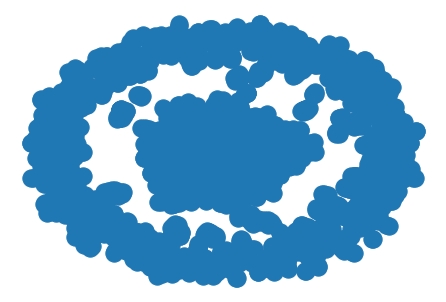

In [54]:
nx.draw(G)